<a href="https://colab.research.google.com/github/tarungangadhar/Classification_DNN/blob/main/DNN_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Neural Network for a classification Data Set
---

In [ ]:
%%bash

gdown 1_n5odu1KSpBAqO_Ddbqy2Ty0mG12Dr0A
gdown 1C7GK_uY0srlUdLfHfGa4IZcfthmmdROr

Downloading...
From: https://drive.google.com/uc?id=1_n5odu1KSpBAqO_Ddbqy2Ty0mG12Dr0A
To: /content/spiral_features.npy
100%|██████████| 4.93k/4.93k [00:00<00:00, 21.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1C7GK_uY0srlUdLfHfGa4IZcfthmmdROr
To: /content/spiral_target.npy
100%|██████████| 428/428 [00:00<00:00, 2.33MB/s]


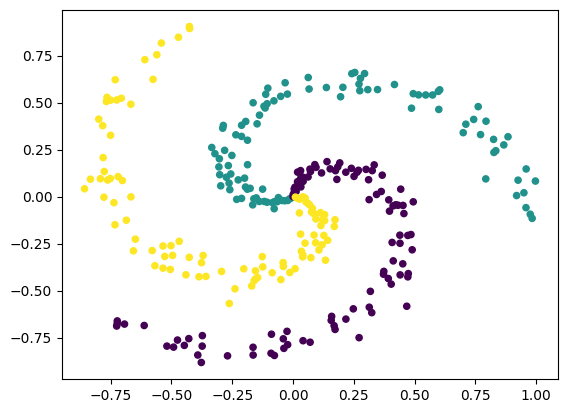

In [ ]:
features = (np.load(DATA_DIR / "spiral_features.npy")
              .astype(np.float32))
target = np.load(DATA_DIR / "spiral_target.npy")

# visualize the data
plt.scatter(features[:, 0], features[:, 1], c=target, s=20)
plt.show()

## a) Splitting the dataset into training and testing sets

---

In [ ]:
import numpy as np
shuffled_ind = np.random.permutation(len(features))
shuffled_features = features[shuffled_ind]
shuffled_target = target[shuffled_ind]
mod_index = int(0.8 * len(features))  # 80% for training
traindata_features = shuffled_features[:mod_index]
testdata_features = shuffled_features[mod_index:]
traindata_target = shuffled_target[:mod_index]
testdata_target = shuffled_target[mod_index:]

print(traindata_features.shape, testdata_features.shape)
print(traindata_target.shape, testdata_target.shape)


(240, 2) (60, 2)
(240,) (60,)


## b) Training a logistic regression model

---


In [ ]:
#importing libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as utils_data

#preparing the data
train_features_tensor = torch.from_numpy(traindata_features)
train_target_tensor = torch.from_numpy(traindata_target)

train_dataset = utils_data.TensorDataset(train_features_tensor, train_target_tensor)

test_features_tensor = torch.from_numpy(testdata_features)
test_target_tensor = torch.from_numpy(testdata_target)

test_dataset = utils_data.TensorDataset(test_features_tensor, test_target_tensor)

train_dataloader = utils_data.DataLoader(train_dataset, batch_size=40, shuffle=True)
test_dataloader = utils_data.DataLoader(test_dataset, batch_size=40, shuffle=False)

#Defining the logistic regression model
class LogisticRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, x):    #forward pass
        return self.linear(x)

lr_model = LogisticRegression(traindata_features.shape[1], 3)
criterion = nn.CrossEntropyLoss() #Loss Creieria (faster learning rate and convergence)
#because it has a steeper gradient when the predicted output is far from the true output
optimizer = optim.SGD(lr_model.parameters(), lr=0.01) #Stocashtic Gradient Descent

# Training loop for logistic regression
for _ in range(2000):
    for features, labels in train_dataloader:
        optimizer.zero_grad()
        outputs = lr_model(features.float())
        loss = criterion(outputs, labels)
        loss.backward()   #Backpropagation
        optimizer.step()
print("Logistic Regression Model Training Complete.")

Logistic Regression Model Training Complete.


## c) Assessing the performance of your logistic regression model

---

In [ ]:
def calculate_loss_and_accuracy(model, dataloader):
    total_loss = 0
    total_correct = 0
    total_samples = 0

    with torch.no_grad():
        for features, labels in dataloader:
            outputs = model(features.float())
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_correct += (predicted == labels).sum().item() #to the ground truth
            total_samples += labels.size(0)

    average_loss = total_loss / len(dataloader)
    accuracy = total_correct / total_samples * 100

    return average_loss, accuracy

train_loss, train_accuracy = calculate_loss_and_accuracy(lr_model, train_dataloader)
test_loss, test_accuracy = calculate_loss_and_accuracy(lr_model, test_dataloader)

print(f"Training Loss: {train_loss:.4f}, Accuracy: {train_accuracy:.2f}%")
print(f"Testing Loss: {test_loss:.4f}, Accuracy: {test_accuracy:.2f}%")



Training Loss: 0.7624, Accuracy: 50.42%
Testing Loss: 0.6572, Accuracy: 58.33%


Comments:-  logistic regression model in its current state appears to have limited predictive power and is not performing well on both the training and testing datasets.

## d) Building a neural network classifier

---

In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(NeuralNetwork, self).__init__()
        self.hidden_layer = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.output_layer = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        out = self.hidden_layer(x)
        out = self.relu(out)
        out = self.output_layer(out)
        return out

nn_model = NeuralNetwork(traindata_features.shape[1], 100, 3)
optimizer = optim.SGD(nn_model.parameters(), lr=0.01)

# Training loop for neural network
for _ in range(2000):
    for features, labels in train_dataloader:
        optimizer.zero_grad()
        outputs = nn_model(features.float())
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

## e) Assessing the performance of your neural network

---


In [ ]:
def calculate_loss_and_accuracy(model, dataloader):
    total_loss = 0
    total_correct = 0
    total_samples = 0

    with torch.no_grad():
        for features, labels in dataloader:
            outputs = model(features.float())
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_correct += (predicted == labels).sum().item()
            total_samples += labels.size(0)

    average_loss = total_loss / len(dataloader)
    accuracy = total_correct / total_samples * 100

    return average_loss, accuracy

train_loss, train_accuracy = calculate_loss_and_accuracy(lr_model, train_dataloader)
test_loss, test_accuracy = calculate_loss_and_accuracy(lr_model, test_dataloader)

print(f"Training Loss (LR): {train_loss:.4f}, Accuracy: {train_accuracy:.2f}%")
print(f"Testing Loss (LR): {test_loss:.4f}, Accuracy: {test_accuracy:.2f}%")

train_loss, train_accuracy = calculate_loss_and_accuracy(nn_model, train_dataloader)
test_loss, test_accuracy = calculate_loss_and_accuracy(nn_model, test_dataloader)

print(f"Training Loss (NN): {train_loss:.4f}, Accuracy: {train_accuracy:.2f}%")
print(f"Testing Loss (NN): {test_loss:.4f}, Accuracy: {test_accuracy:.2f}%")


Training Loss (LR): 0.7638, Accuracy: 50.00%
Testing Loss (LR): 0.6592, Accuracy: 58.33%
Training Loss (NN): 0.3082, Accuracy: 87.08%
Testing Loss (NN): 0.2518, Accuracy: 93.33%


Comments:-
the results suggest that the neural network (NN) model outperforms the logistic regression (LR) model in terms of accuracy and loss. The NN model shows strong learning capability and performs well on both the training and testing data

## f) Interpreting the confusion matrix

---

In [ ]:
from sklearn import metrics

In [ ]:
metrics.confusion_matrix

<function sklearn.metrics._classification.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)>

In [ ]:

# Evaluating model performance on training data
lr_model.eval()
with torch.no_grad():
    train_outputs_lr = lr_model(train_features_tensor)
    _, train_predicted_lr = torch.max(train_outputs_lr.data, 1)
    train_confusion_matrix_lr = metrics.confusion_matrix(traindata_target, train_predicted_lr)

nn_model.eval()
with torch.no_grad():
    train_outputs_nn = nn_model(train_features_tensor)
    _, train_predicted_nn = torch.max(train_outputs_nn.data, 1)
    train_confusion_matrix_nn = metrics.confusion_matrix(traindata_target, train_predicted_nn)

# EvaluatING model performance on testing data
lr_model.eval()
with torch.no_grad():
    test_outputs_lr = lr_model(test_features_tensor)
    _, test_predicted_lr = torch.max(test_outputs_lr.data, 1)
    test_confusion_matrix_lr = metrics.confusion_matrix(testdata_target, test_predicted_lr)

nn_model.eval()
with torch.no_grad():
    test_outputs_nn = nn_model(test_features_tensor)
    _, test_predicted_nn = torch.max(test_outputs_nn.data, 1)
    test_confusion_matrix_nn = metrics.confusion_matrix(testdata_target, test_predicted_nn)

# Printing the confusion matrices
print("Confusion Matrix - Training Data (Logistic Regression):")
print(train_confusion_matrix_lr)
print("\nConfusion Matrix - Testing Data (Logistic Regression):")
print(test_confusion_matrix_lr)

print("\nConfusion Matrix - Training Data (Neural Network):")
print(train_confusion_matrix_nn)
print("\nConfusion Matrix - Testing Data (Neural Network):")
print(test_confusion_matrix_nn)


Confusion Matrix - Training Data (Logistic Regression):
[[39 27 13]
 [ 4 45 30]
 [40  6 36]]

Confusion Matrix - Testing Data (Logistic Regression):
[[12  6  3]
 [ 1 11  9]
 [ 5  1 12]]

Confusion Matrix - Training Data (Neural Network):
[[69  8  2]
 [ 0 68 11]
 [10  0 72]]

Confusion Matrix - Testing Data (Neural Network):
[[21  0  0]
 [ 0 17  4]
 [ 0  0 18]]


# **COMMENTS**:-

---



### 1.**Confusion Matrix - Training Data (Logistic Regression):**
*moderate performance with varying results across the classes.*

### 2.**Confusion Matrix - Testing Data (Logistic Regression):**
*The model performs relatively better on the testing data, especially in terms of correctly classifying class 1 samples.*

### 3.**Confusion Matrix - Training Data (Neural Network):**
*The model shows higher accuracy compared to the Logistic Regression model, particularly for classes 1 and 3.*

### 4.**Confusion Matrix - Testing Data (Neural Network):**
*The model shows high accuracy, with perfect classification for classes 1 and 3*










## g) Create  deep neural network!

---

In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_dim, hidden_dim1, hidden_dim2, hidden_dim3, output_dim):
        super(NeuralNetwork, self).__init__()
        self.hidden_layer1 = nn.Linear(input_dim, hidden_dim1)
        self.relu1 = nn.ReLU()
        self.hidden_layer2 = nn.Linear(hidden_dim1, hidden_dim2)
        self.relu2 = nn.ReLU()
        self.hidden_layer3 = nn.Linear(hidden_dim2, hidden_dim3)  #Added an extra Hidden Layer
        self.relu3 = nn.ReLU()
        self.output_layer = nn.Linear(hidden_dim3, output_dim)

    def forward(self, x):
        out = self.hidden_layer1(x)
        out = self.relu1(out)
        out = self.hidden_layer2(out)
        out = self.relu2(out)
        out = self.hidden_layer3(out)
        out = self.relu3(out)
        out = self.output_layer(out)
        return out

nn_model = NeuralNetwork(traindata_features.shape[1], 100, 50, 25, 3)
optimizer = optim.SGD(nn_model.parameters(), lr=0.01)

# Training loop for neural network
for _ in range(2000):
    for features, labels in train_dataloader:
        optimizer.zero_grad()
        outputs = nn_model(features.float())
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

In [ ]:
def ownNeuralNetwork(model, dataloader):
    total_loss = 0
    total_correct = 0
    total_samples = 0

    with torch.no_grad():
        for features, labels in dataloader:
            outputs = model(features.float())
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_correct += (predicted == labels).sum().item()
            total_samples += labels.size(0)

    average_loss = total_loss / len(dataloader)
    accuracy = total_correct / total_samples * 100

    return average_loss, accuracy

train_loss, train_accuracy = ownNeuralNetwork(nn_model, train_dataloader)
test_loss, test_accuracy = ownNeuralNetwork(nn_model, test_dataloader)

print(f"Training Loss (NN with extra hidden layer): {train_loss:.4f}, Accuracy: {train_accuracy:.2f}%")
print(f"Testing Loss (NN with extra hidden layer): {test_loss:.4f}, Accuracy: {test_accuracy:.2f}%")

Training Loss (NN with extra hidden layer): 0.0373, Accuracy: 99.58%
Testing Loss (NN with extra hidden layer): 0.0239, Accuracy: 98.33%


# Plots

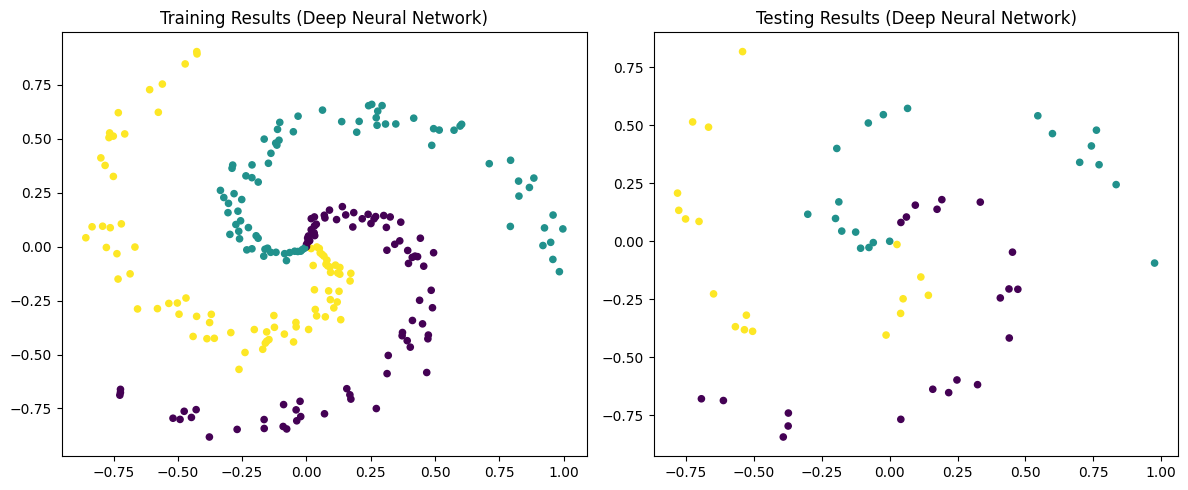

In [ ]:
# Plotting the training and testing results for your own deep neural network
nn_model.eval()
with torch.no_grad():
    train_outputs_deep = nn_model(train_features_tensor)
    _, train_predicted_deep = torch.max(train_outputs_deep.data, 1)
    test_outputs_deep = nn_model(test_features_tensor)
    _, test_predicted_deep = torch.max(test_outputs_deep.data, 1)

plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.scatter(traindata_features[:, 0], traindata_features[:, 1], c=traindata_target, s=20)
plt.title('Training Results (Deep Neural Network)')
plt.subplot(122)
plt.scatter(testdata_features[:, 0], testdata_features[:, 1], c=testdata_target, s=20)
plt.title('Testing Results (Deep Neural Network)')
plt.tight_layout()
plt.show()
